In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# transport limited + limiting supply 

In [2]:
path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/transport_limited/langtang/'
df = pd.read_csv(path + 'langtang_tl_percentiles_with_coors.csv')
# len(df.columns)
df.columns

Index(['cellnr', 'annual_mean_Qstl_mm', 'annual_25percent_Qstl_mm',
       'annual_50percent_Qstl_mm', 'annual_75percent_Qstl_mm',
       'annual_mean_Qstl_m3', 'annual_25percent_Qstl_m3',
       'annual_50percent_Qstl_m3', 'annual_75percent_Qstl_m3',
       'annual_mean_Qstl_m3_day', 'annual_25percent_Qstl_m3_day',
       'annual_50percent_Qstl_m3_day', 'annual_75percent_Qstl_m3_day',
       'Latitude', 'Longitude', 'z'],
      dtype='object')

In [3]:
ds = df.set_index(['Latitude', 'Longitude']).to_xarray()


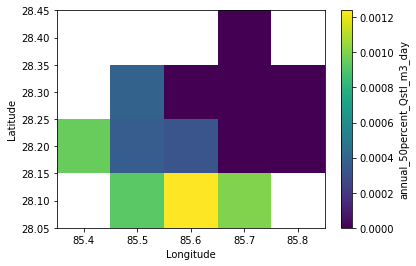

In [4]:
ds.annual_50percent_Qstl_m3_day.plot()


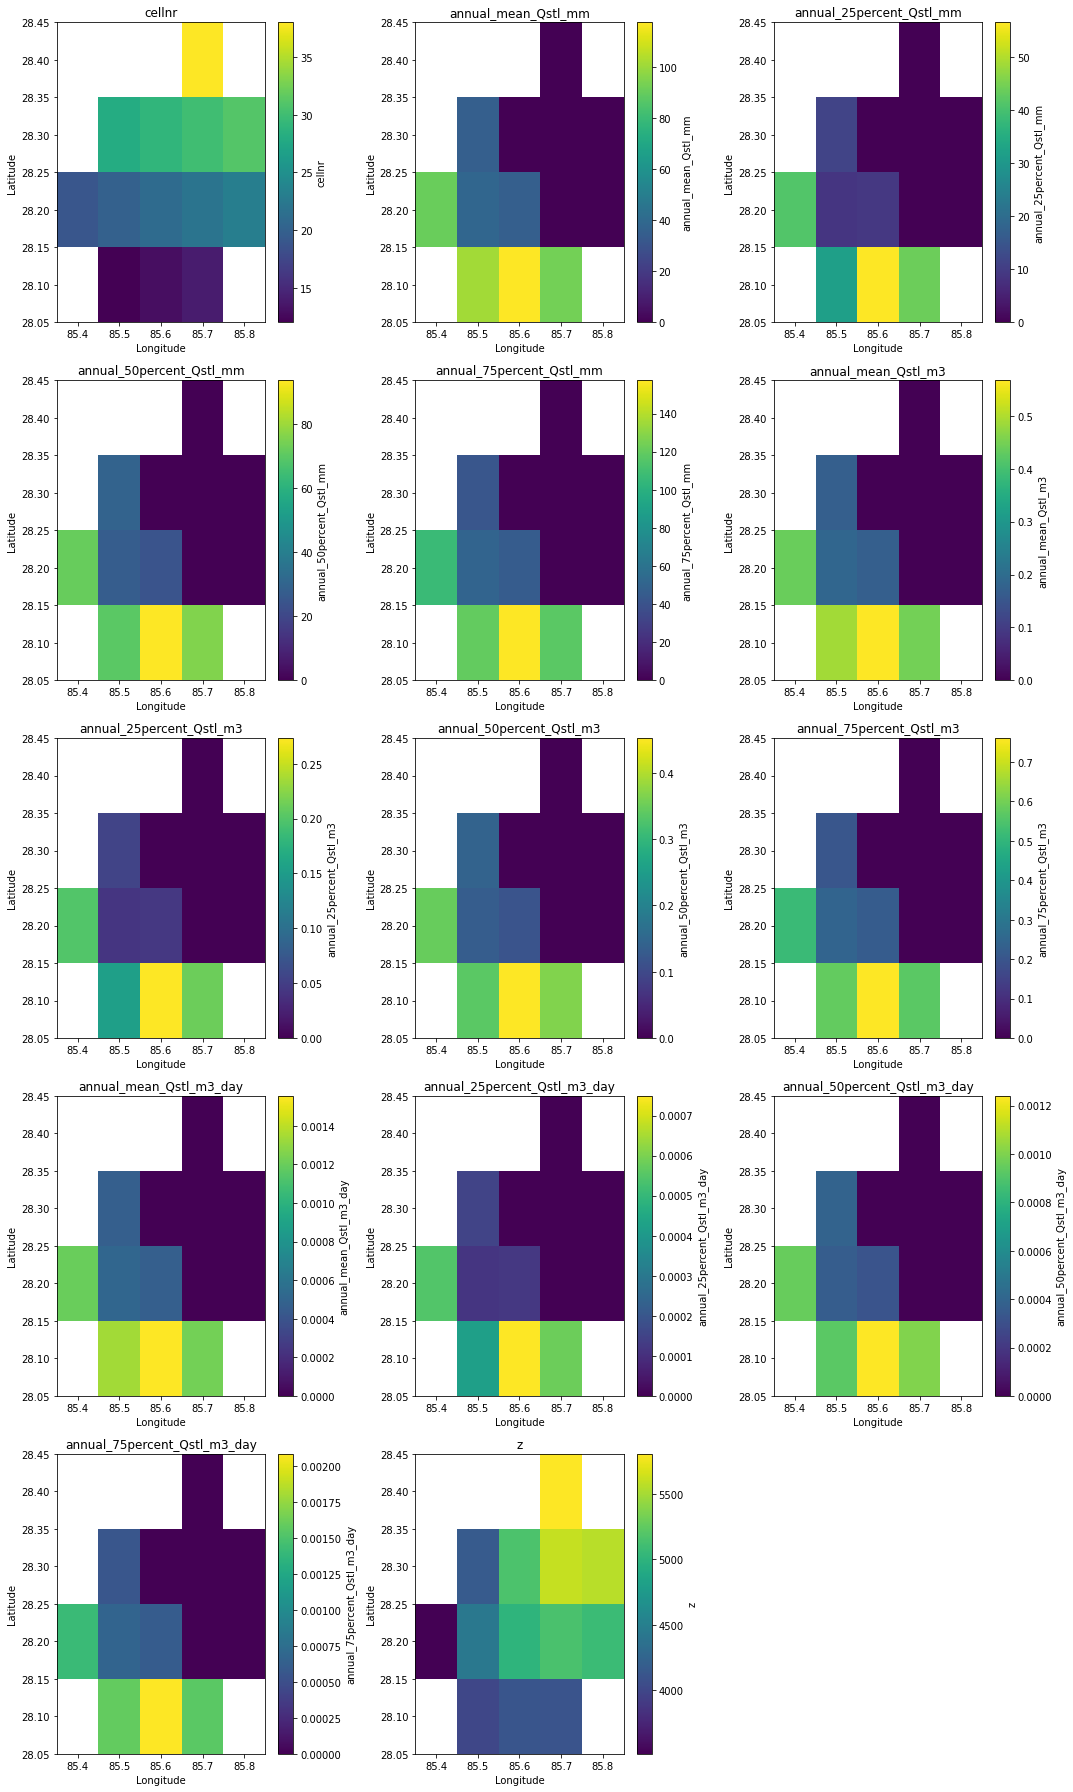

In [5]:
import matplotlib.pyplot as plt
import math

# Assuming ds is a Dataset object from xarray
num_vars = len(ds.data_vars)
cols = 3  # Number of columns for subplots
rows = math.ceil(num_vars / cols)  # Calculate number of rows

fig, axs = plt.subplots(rows, cols, figsize=(15, 5*rows))  # Adjust figsize as needed

# Flatten the axs array to iterate over subplots properly
axs = axs.flatten()

for i, (var_name, var_data) in enumerate(ds.items()):
    # Plotting on the ith axis
    var_data.plot(ax=axs[i])
    axs[i].set_title(var_name)

# Hide empty subplots
for i in range(num_vars, len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()


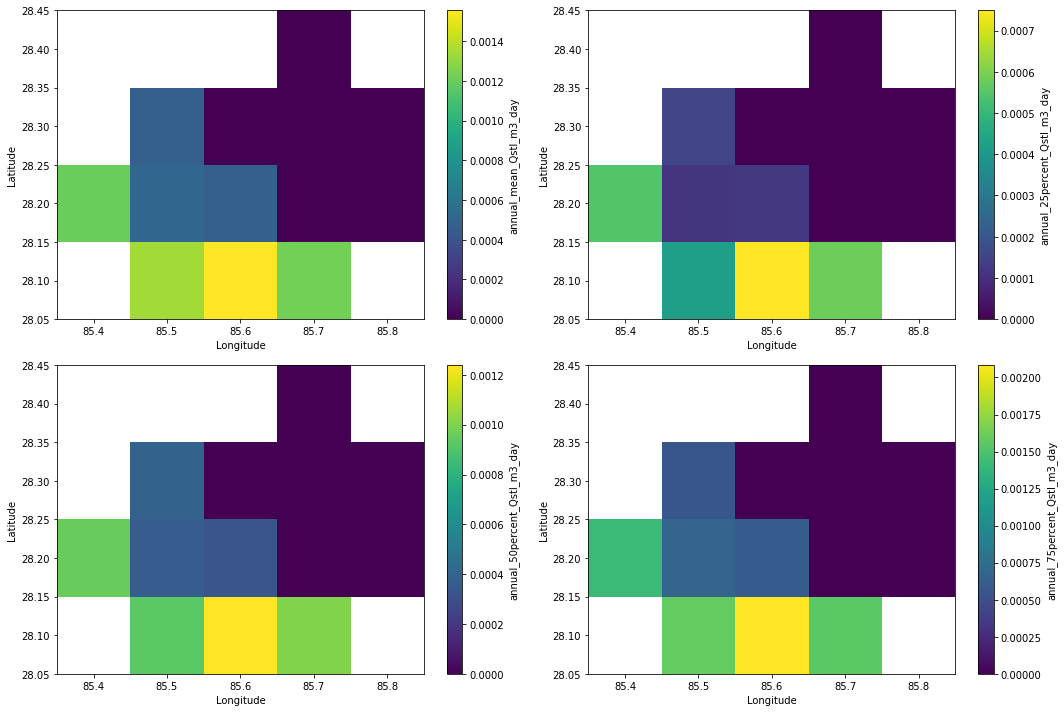

In [6]:
fig = plt.figure(figsize=(15, 10))
mosaic = fig.subplot_mosaic('''
                            ab
                            cd
                            ''')

ds.annual_mean_Qstl_m3_day.plot(ax=mosaic['a'])
ds.annual_25percent_Qstl_m3_day.plot(ax=mosaic['b'])
ds.annual_50percent_Qstl_m3_day.plot(ax=mosaic['c'])
ds.annual_75percent_Qstl_m3_day.plot(ax=mosaic['d'])

plt.tight_layout()


# supply limited example of one cell 

In [108]:
path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/'

Sed_tl = pd.read_csv(path + 'transport_limited/langtang/cellnr21/Sediment.out')

Sed_mean      = pd.read_csv(path + 'supply_limited/langtang_annual_mean/cellnr21/Sediment.out')
Sed_percent25 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean25percent/cellnr21/Sediment.out')
Sed_percent50 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean50percent/cellnr21/Sediment.out')
Sed_percent75 = pd.read_csv(path + 'supply_limited/langtang_annuall_mean75percent/cellnr21/Sediment.out')


# Sed_100m3 = pd.read_csv(path + 'supply_limited/langtang100m3/cellnr/Sediment.out')


In [87]:
# Sed_100m3

## plot time-series all together

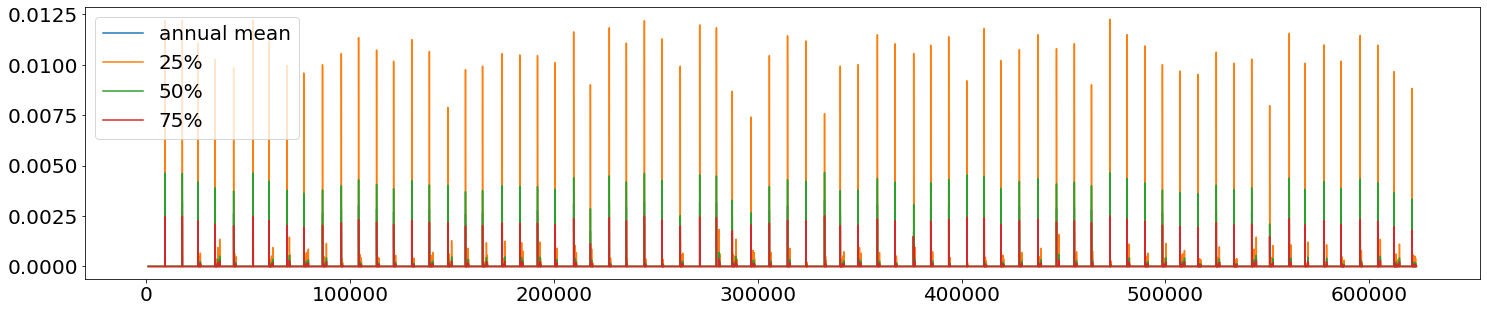

In [88]:
endindex = 200000

plt.figure(figsize = (25, 5))

# Sed_tl.Qstl.plot(label = 'Qstl')

Sed_mean.Q100[1000:].plot(label = 'annual mean')

Sed_percent25.Q100[1000:].plot(label = '25%')
Sed_percent50.Q100[1000:].plot(label = '50%')
Sed_percent75.Q100[1000:].plot(label = '75%')

# Sed_percent25.sc[1000:].plot(label = 'sc 25%')
# Sed_percent50.sc[1000:].plot(label = 'sc 50%')
# Sed_percent75.sc[1000:].plot(label = 'sc 75%')

# Sed_100m3.sc.plot(label = 'sc 100m3')

plt.legend()

Text(0.5, 1.0, 'sediment storage')

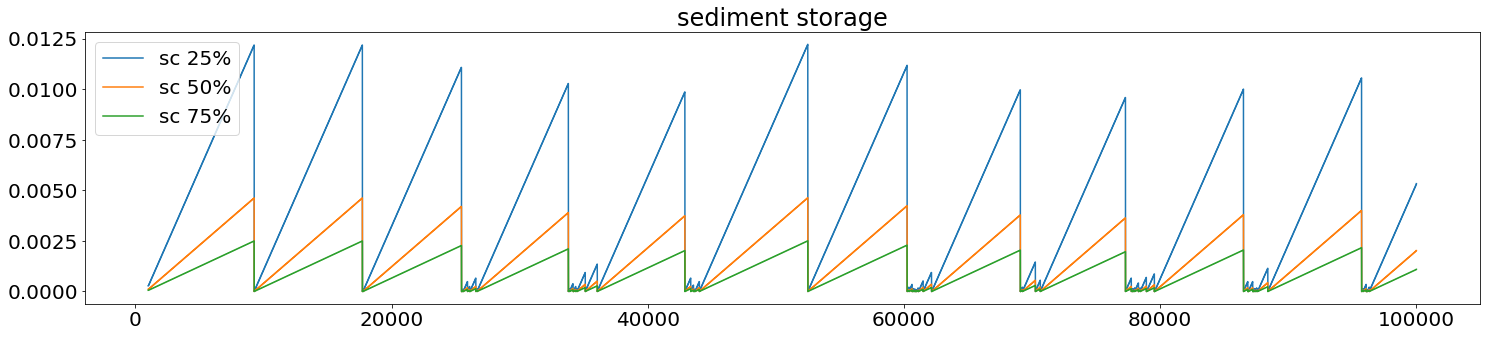

In [103]:
endindex = 200000
plt.rcParams.update({'font.size': 20})

plt.figure(figsize = (25, 5))

# Sed_tl.Qstl.plot(label = 'Qstl')

# Sed_mean.Q100[1000:].plot(label = 'annual mean')

# Sed_percent25.Q100[1000:].plot(label = '25%')
# Sed_percent50.Q100[1000:].plot(label = '50%')
# Sed_percent75.Q100[1000:].plot(label = '75%')

Sed_percent25.sc[1000:100000].plot(label = 'sc 25%')
Sed_percent50.sc[1000:100000].plot(label = 'sc 50%')
Sed_percent75.sc[1000:100000].plot(label = 'sc 75%')

# Sed_100m3.sc.plot(label = 'sc 100m3')

plt.legend()
plt.title('sediment storage')

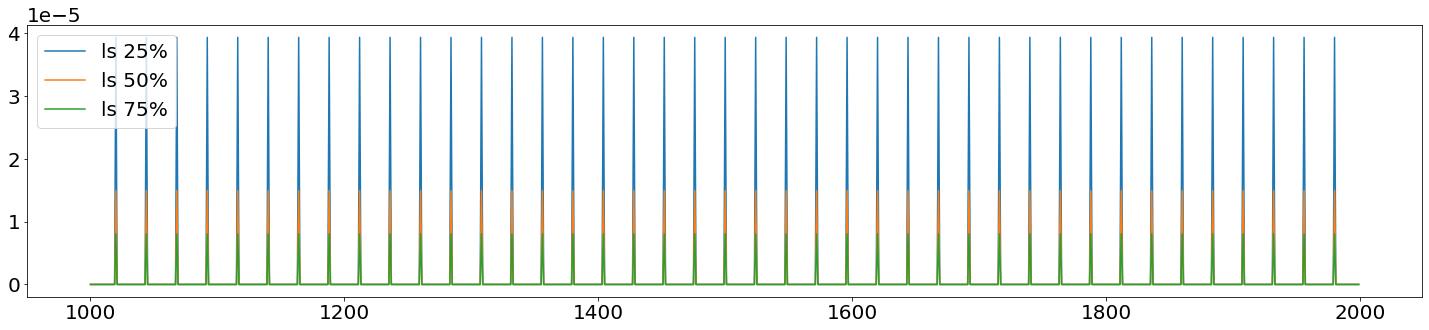

In [107]:
endindex = 200000
plt.rcParams.update({'font.size': 20})

plt.figure(figsize = (25, 5))


Sed_percent25.ls[1000:2000].plot(label = 'ls 25%')
Sed_percent50.ls[1000:2000].plot(label = 'ls 50%')
Sed_percent75.ls[1000:2000].plot(label = 'ls 75%')
plt.legend()



In [106]:
34/365

0.09315068493150686

## plot pther things 

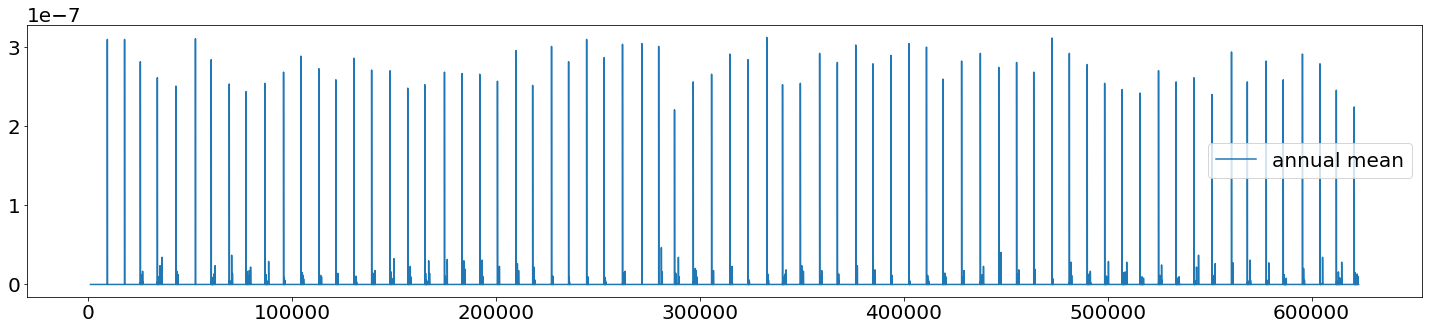

In [110]:
# endindex = 100000

plt.figure(figsize = (25, 5))

# Sed_tl.Qstl.plot(label = 'Qstl')
# Sed_tl.sc.plot(label = 'Qstl sc') #(input was 1)


Sed_mean.Q100[1000:].plot(label = 'annual mean')
# Sed_mean.sc.plot(label = 'annual mean sc')

# Sed_percent25.Q100.plot(label = '25% Q100')
# Sed_percent25.sc.plot(label = '25% sc')

# Sed_percent50.Q100.plot(label = '50%')
# Sed_percent75.Q100.plot(label = '75%')


# Sed_100m3.sc.plot(label = '100m3 sc')
# Sed_100m3.Q100.plot(label = '100m3')

plt.legend()

## plot total annual

In [111]:
def annual_sum_mean(df):
    df['D'] = pd.to_datetime(df['D'])
    df['Year'] = df['D'].dt.year
    annual_sum = df.groupby('Year').sum()
    return annual_sum[1:]

Sed_mean_mean_annual      = annual_sum_mean(Sed_mean)
Sed_percent25_mean_annual = annual_sum_mean(Sed_percent25)
Sed_percent50_mean_annual = annual_sum_mean(Sed_percent50)
Sed_percent75_mean_annual = annual_sum_mean(Sed_percent75)

# Sed_100m3_mean_annual = annual_sum_mean(Sed_100m3)

In [92]:
# Sed_mean_mean_annual
# Sed_100m3_mean_annual

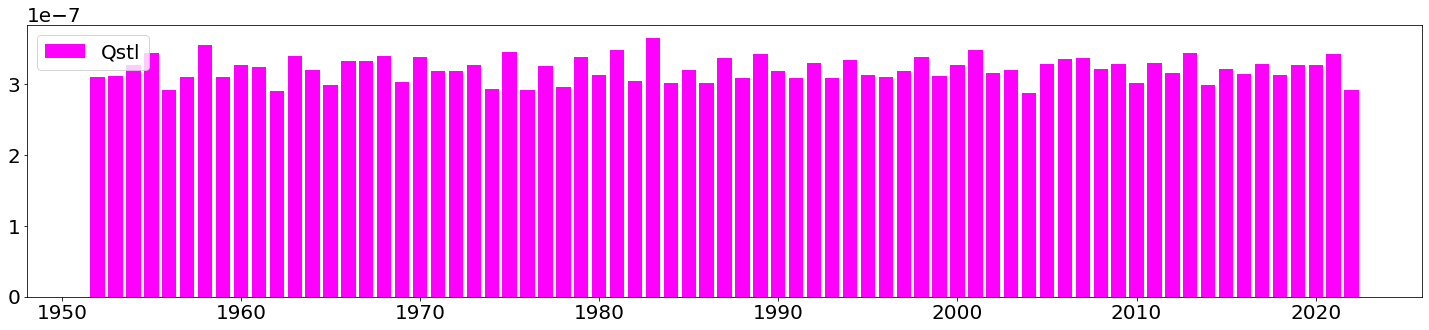

In [112]:
plt.figure(figsize=(25,5))


# # sediment limited
# plt.bar(height = Sed_percent25_mean_annual.Q100, x = Sed_percent25_mean_annual.index, color = 'yellow', alpha = 0.5, label = '25% Q100')
# plt.bar(height = Sed_percent50_mean_annual.Q100, x = Sed_percent50_mean_annual.index, color = 'lime', alpha = 0.5, label = '50% Q100')
# plt.bar(height = Sed_percent75_mean_annual.Q100, x = Sed_percent75_mean_annual.index, color = 'green', alpha = 0.5, label = '75% Q100')


# transport limited
plt.bar(height = Sed_mean_mean_annual.Q100, x = Sed_mean_mean_annual.index, color = 'magenta', label = 'Qstl')


# plt.bar(height = Sed_100m3_mean_annual.Q100, x = Sed_100m3_mean_annual.index, color = 'cyan', alpha = 0.5, label = '100m3')

plt.legend()




## plot mean monthly 

In [127]:

def monthly_sum_mean(df):
    df['D'] = pd.to_datetime(df['D'])
    df['Year'] = df['D'].dt.year
    df['Month'] = df['D'].dt.month
    monthly_sum = df.resample('M').sum()
    mean_monthly_sum = monthly_sum.groupby(monthly_sum.index.month).mean()

    # monthly_mean = monthly_sum.Qstl.mean()
    return mean_monthly_sum









Sed_mean_mean_monthly      = monthly_sum_mean(Sed_mean)
Sed_percent25_mean_monthly = monthly_sum_mean(Sed_percent25)
Sed_percent50_mean_monthly = monthly_sum_mean(Sed_percent50)
Sed_percent75_mean_monthly = monthly_sum_mean(Sed_percent75)

# Sed_100m3_mean_monthly = monthly_sum_mean(Sed_100m3)


ValueError: Invalid frequency: Month

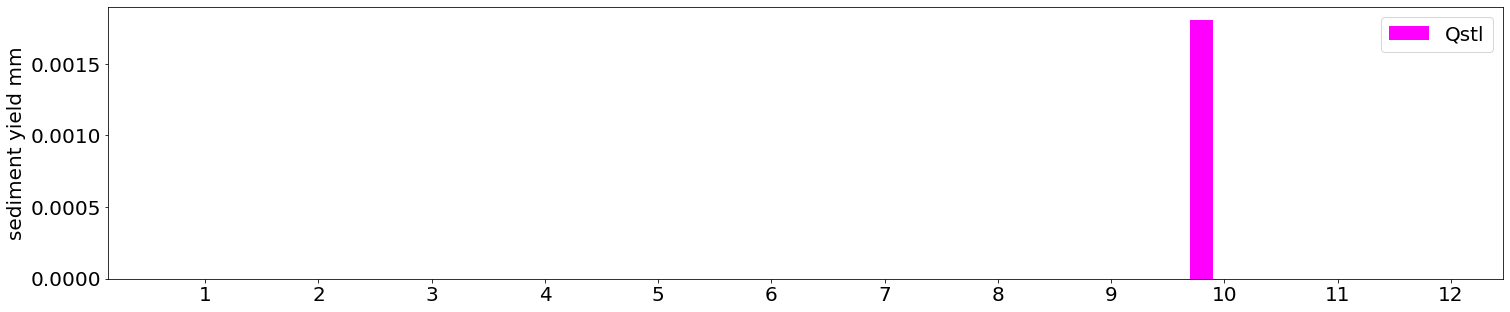

In [124]:
# plt.figure(figsize=(25,5))
fig, ax = plt.subplots(figsize=(25, 5))
width = 0.2
# # transport limited
ax.bar(height = Sed_mean_mean_monthly.Q100, x = Sed_mean_mean_monthly.index-0.2, width = width, color = 'magenta', label = 'Qstl')

# # sediment limited
# ax.bar(height = Sed_percent25_mean_monthly.Q100, x = Sed_percent25_mean_monthly.index-0.1, width = width, color = 'yellow', alpha = 0.5, label = '25% Q100')
# ax.bar(height = Sed_percent50_mean_monthly.Q100, x = Sed_percent50_mean_monthly.index, width = width,color = 'lime', alpha = 0.5, label = '50% Q100')
# ax.bar(height = Sed_percent75_mean_monthly.Q100, x = Sed_percent75_mean_monthly.index+0.1, width = width, color = 'green', alpha = 0.5, label = '75% Q100')


# plt.bar(height = Sed_100m3_mean_monthly.Q100, x = Sed_100m3_mean_monthly.index, color = 'cyan', alpha = 0.5, label = '100 m3')

# plt.legend()
ax.set_ylabel('sediment yield mm', fontsize=20)

ax.set_xticks(Sed_percent25_mean_monthly.index, fontsize=20 )
ax.set_xticklabels(Sed_percent25_mean_monthly.index, fontsize=20)#rotation=45)
ax.legend(fontsize=20 )
# fig.tight_layout()


<BarContainer object of 12 artists>

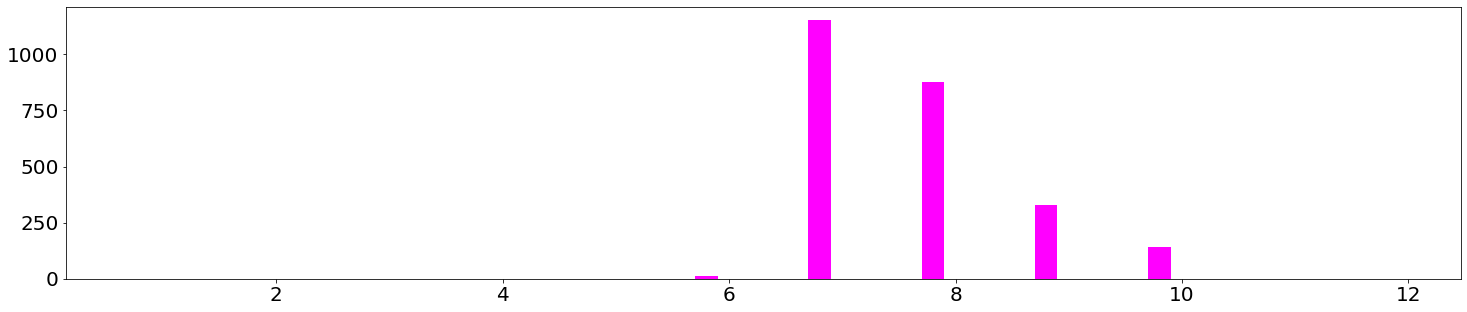

In [117]:
# plt.figure(figsize=(25,5))
fig, ax = plt.subplots(figsize=(25, 5))
width = 0.2
# # transport limited
ax.bar(height = Sed_mean_mean_monthly.Qstl, x = Sed_mean_mean_monthly.index-0.2, width = width, color = 'magenta', label = 'Qstl')


In [118]:
1000/70

14.285714285714286

## hydro.out: what is happening on 2012?


In [52]:
path = '/Users/varyabazilova/Desktop/paper2/downscaling_simple/'

hydro = pd.read_csv(path + 'supply_limited/langtang_annual_mean/cellnr19/Hydro.out')


def annual_sum_mean(df):
    df['D'] = pd.to_datetime(df['D'])
    df['Year'] = df['D'].dt.year
    annual_sum = df.groupby('Year').mean()
    # monthly_mean = monthly_sum.Qstl.mean()
    return annual_sum


annual_hydro = annual_sum_mean(hydro)
# annual_hydro

<BarContainer object of 72 artists>

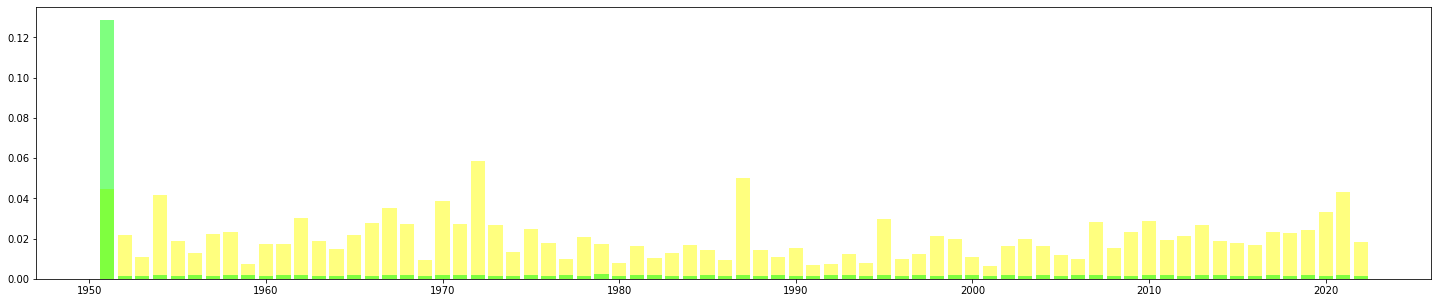

In [53]:
plt.figure(figsize=(25,5))


# sediment limited
plt.bar(height = annual_hydro.Q, x = annual_hydro.index, color = 'yellow', alpha = 0.5, label = 'Q')
plt.bar(height = Sed_percent50_mean_annual.Q100, x = Sed_percent50_mean_annual.index, color = 'lime', alpha = 0.5, label = '50% Q100')
# plt.bar(height = Sed_percent75_mean_annual.Q100, x = Sed_percent75_mean_annual.index, color = 'green', alpha = 0.5, label = '75% Q100')
# ax.bar(x=df.D+0.1, height=df.Qdftl, width=width, label='only DF sediments',  alpha=0.7, color='chartreuse')



# magnitude frequency for dfs 

In [101]:
(15/4.83)

3.1055900621118013

In [102]:
3.1055900621118013 / 10**3

0.0031055900621118015